<a href="https://colab.research.google.com/github/ArincDemirel/PyTorch--Deep-Learning-Projects/blob/main/02_Neural_Network_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 02.Neural Network Classification with PyTorch
Resource Notebook: https://www.learnpytorch.io/02_pytorch_classification/


In [1]:
# Classification with PyTorch
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000


In [3]:
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [6]:
import pandas as pd
circles = pd.DataFrame({'X1':X[:,0],
                        "X2":X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
import matplotlib.pyplot as plt

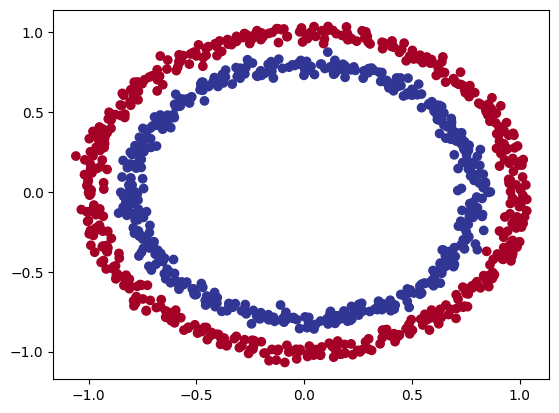

In [8]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c =y,
            cmap = plt.cm.RdYlBu);

* Let's clasify two circles from each other
* We will be classfying a data point which fits in to which circle and it will be labeled either 0 or 1
* We will turn the data into tensors

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
import torch
torch.__version__

'2.1.0+cu118'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
X_tensor = torch.from_numpy(X).type(torch.float)
y_tensor = torch.from_numpy(y).type(torch.float)
X_tensor

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [13]:
#Split data into test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [14]:
X_train.T.shape, X_test.shape , y_train.shape, y_test.shape

(torch.Size([2, 800]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [15]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
class CircleClassifierModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling X and y input and output shapes
    self.layer_1 = nn.Linear(in_features = 2, out_features = 8 ) # takes 2 in features and up scales to 8
    self.layer_2 = nn.Linear(in_features = 8 , out_features = 1 )

  def forward(self, x):
    return self.layer_2(self.layer_1(x) ) # x -> layer 1 -> layer2


In [17]:
model_0 = CircleClassifierModelV0().to(device)
model_0

CircleClassifierModelV0(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [18]:
model_0_replicate = nn.Sequential(nn.Linear(in_features = 2, out_features = 8 ),
                                  nn.Linear(in_features = 2, out_features = 8 )).to(device)
model_0_replicate

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=2, out_features=8, bias=True)
)

In [19]:
class CircleClassifierModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling X and y input and output shapes
    # self.layer_1 = nn.Linear(in_features = 2, out_features = 8 ) # takes 2 in features and up scales to 8
    # self.layer_2 = nn.Linear(in_features = 8 , out_features = 1 )
    self.two_layers = nn.Sequential(nn.Linear(in_features = 2, out_features = 8 ),
                                  nn.Linear(in_features = 2, out_features = 8 ))
  def forward(self, x):
    # return self.layer_2(self.layer_1(x) ) # x -> layer 1 -> layer2
    return self.two_layers(x)


In [20]:
model_1 = CircleClassifierModelV1().to(device)
model_1

CircleClassifierModelV1(
  (two_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=2, out_features=8, bias=True)
  )
)

In [21]:
model_1.state_dict()

OrderedDict([('two_layers.0.weight',
              tensor([[ 0.0128, -0.4352],
                      [ 0.4721, -0.4428],
                      [ 0.0300,  0.6721],
                      [ 0.3754,  0.4749],
                      [-0.3778,  0.5735],
                      [-0.5713, -0.5121],
                      [ 0.0178,  0.3132],
                      [-0.3870, -0.6401]], device='cuda:0')),
             ('two_layers.0.bias',
              tensor([ 0.5729,  0.6935,  0.1351, -0.3379, -0.1546, -0.1383, -0.0073, -0.1134],
                     device='cuda:0')),
             ('two_layers.1.weight',
              tensor([[ 0.5643, -0.0720],
                      [ 0.6020,  0.1990],
                      [ 0.3638,  0.3038],
                      [-0.3202, -0.3848],
                      [ 0.0026, -0.1534],
                      [-0.1132,  0.3789],
                      [-0.5880, -0.4927],
                      [-0.5315, -0.2296]], device='cuda:0')),
             ('two_layers.1.bias',
         

In [22]:
model_1.state_dict()['two_layers.0.weight'].shape # 2 inputs 8 outputs the the tensor is 8,2


torch.Size([8, 2])

In [23]:
device

'cuda'

In [24]:
with torch.inference_mode(): ## Inference mode is gonna keep track of the gradient
  y_preds = model_0(X_test.to(device))
torch.round(y_preds[:10])

tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [-0.],
        [0.]], device='cuda:0')

In [25]:
y_test.reshape([200,1]).shape,y_preds.shape

(torch.Size([200, 1]), torch.Size([200, 1]))

In [26]:
#let's calculate cross entropy for loss function, since this is a binary classification problem let's use BCE

loss_fn = torch.nn.BCEWithLogitsLoss()

In [27]:
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01) # lr learnining rate

In [28]:
X_train.shape,X_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [29]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_pred)) * 100
  return acc

In [30]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:10]

tensor([[ 0.1800],
        [ 0.3994],
        [-0.1339],
        [ 0.2678],
        [ 0.2810],
        [ 0.4118],
        [ 0.7008],
        [ 0.7048],
        [-0.1509],
        [ 0.4187]], device='cuda:0')

# Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

* Our model outputs are going to be raw logits.
* We can convert there logits into prdiction probabilities by passing them to some kind of activation funbvtion(e.g. sigmoid for binary clasification and softmax for multiclass clasification)
* Then we can convert our model's prediction probabilities to predcition lables by either rounding them or taking the argmax().

In [31]:
device

'cuda'

In [32]:
torch.cuda.manual_seed(42)
def model_run(X_train, y_train, X_test , y_test, loss_fn , optimizer , model ,epochs = 1000):

  device = "cuda" if torch.cuda.is_available() else "cpu"
  # Put data to the target device

  X_train, y_train = X_train.to(device), y_train.to(device)
  X_test, y_test = X_test.to(device), y_test.to(device)

  for epoch in range(epochs):

    model.train()

    y_logits = model(X_train).squeeze().to(device)
    y_pred_train = torch.round(torch.sigmoid(y_logits))

    train_loss = loss_fn(y_logits, y_train)
    acc_train = accuracy_fn(y_true=y_train, y_pred=y_pred_train)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()
    model.eval() # turns off gradient tracking(testing step)

    with torch.inference_mode():
      y_logits_test = model(X_test).squeeze()
      test_loss = loss_fn(y_logits_test, y_test)
      y_pred_test = torch.round(torch.sigmoid(y_logits))
      acc_test = accuracy_fn(y_true=y_train, y_pred=y_pred_test)


    if epoch %10 == 0:
      print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {acc_train:.2f}% | Test loss: {test_loss:.5f}, Test acc: {acc_test:.2f}%")
      print(f"-------")

In [33]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)
model_run(X_train, y_train, X_test, y_test, loss_fn , optimizer = optimizer  , model = model_0 , epochs = 1000)

Epoch: 0 | Loss: 0.70873, Accuracy: 53.62% | Test loss: 0.72007, Test acc: 53.62%
-------
Epoch: 10 | Loss: 0.70776, Accuracy: 53.12% | Test loss: 0.71892, Test acc: 53.12%
-------
Epoch: 20 | Loss: 0.70687, Accuracy: 53.12% | Test loss: 0.71785, Test acc: 53.12%
-------
Epoch: 30 | Loss: 0.70605, Accuracy: 53.00% | Test loss: 0.71686, Test acc: 53.00%
-------
Epoch: 40 | Loss: 0.70529, Accuracy: 52.62% | Test loss: 0.71592, Test acc: 52.62%
-------
Epoch: 50 | Loss: 0.70458, Accuracy: 52.62% | Test loss: 0.71505, Test acc: 52.62%
-------
Epoch: 60 | Loss: 0.70392, Accuracy: 52.75% | Test loss: 0.71423, Test acc: 52.75%
-------
Epoch: 70 | Loss: 0.70331, Accuracy: 52.62% | Test loss: 0.71347, Test acc: 52.62%
-------
Epoch: 80 | Loss: 0.70275, Accuracy: 52.62% | Test loss: 0.71275, Test acc: 52.62%
-------
Epoch: 90 | Loss: 0.70222, Accuracy: 52.88% | Test loss: 0.71207, Test acc: 52.88%
-------
Epoch: 100 | Loss: 0.70173, Accuracy: 52.12% | Test loss: 0.71143, Test acc: 52.12%
-------

In [22]:
from torch.autograd import Variable
import torch
import numpy as np

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on).to(device)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot

    y_pred = y_pred.reshape(xx.shape).detach().cpu().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

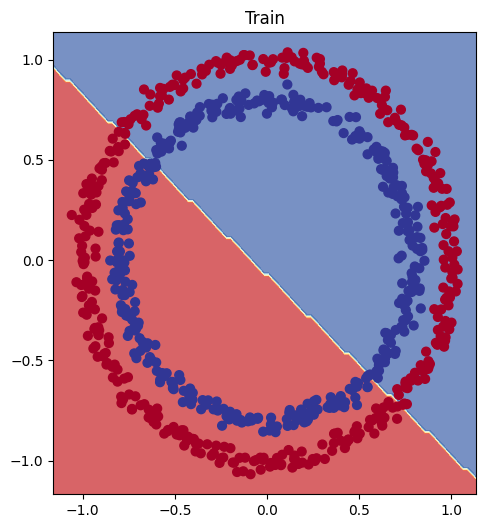

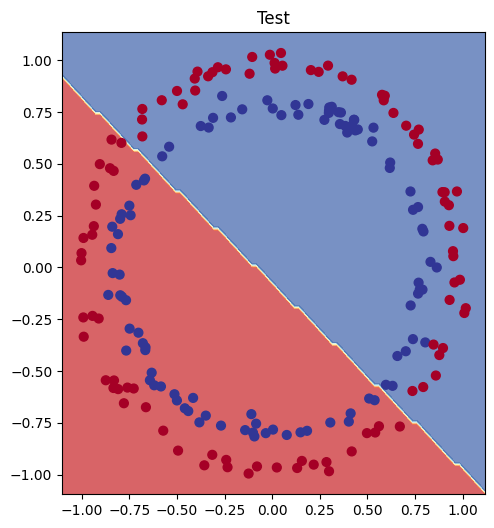

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

This graph summarizes the 50 percent accuracy since it is splitting the graph into half and classify.

Let's improve the model :)
What to try ?

--> Add more layers

--> Add more hidden units

--> Change the activation function

--> Change learning rate


--> Change loss function

P.S.: This is a self improvement trial project, it is clearly seen that this problem is not linearly solvable and our layers are only linear :)

In [36]:
import matplotlib.pyplot as plt
import sklearn
import torch
from sklearn.datasets import make_circles

from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

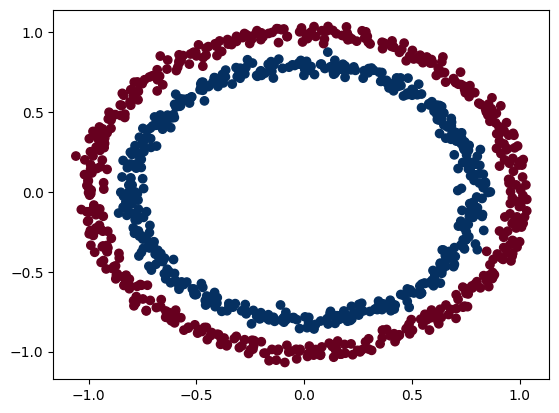

In [37]:
torch.cuda.manual_seed(42)
n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [39]:
X_tensor = torch.from_numpy(X).type(torch.float).to(device)
y_tensor = torch.from_numpy(y).type(torch.float).to(device)

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X_tensor,
                                                    y_tensor,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [41]:
class CircleClassifierModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 8)
    self.layer_2 = nn.Linear(in_features = 8, out_features = 8)
    self.layer_3 = nn.Linear(in_features = 8, out_features = 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))))



In [42]:
model_2 = CircleClassifierModelV2().to(device)

In [43]:
X_train.device, y_train.device, X_test.device, y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [44]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.03)
# model_run(X_train, y_train, X_test, y_test, loss_fn , optimizer = optimizer , model = model_2, epochs = 1000)

In [45]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_pred)) * 100
  return acc

In [46]:
epochs = 10000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_2.train()

  y_logits = model_2(X_train).squeeze()

  y_pred_train = torch.round(torch.sigmoid(y_logits))

  train_loss = loss_fn(y_logits, y_train)
  acc_train = accuracy_fn(y_true=y_train, y_pred=y_pred_train)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()
  model_2.eval() # turns off gradient tracking(testing step)

  with torch.inference_mode():
    y_logits_test = model_2(X_test).squeeze()
    test_loss = loss_fn(y_logits_test, y_test)
    y_pred_test = torch.round(torch.sigmoid(y_logits))
    acc_test = accuracy_fn(y_true=y_train, y_pred=y_pred_test)


  if epoch %100 == 0:
    print(f"Epoch: {epoch+100} | Train Loss: {train_loss:.5f}, Train Accuracy: {acc_train:.2f}% | Test loss: {test_loss:.5f}, Test acc: {acc_test:.2f}%")
    print(f"-------")

Epoch: 100 | Train Loss: 0.69331, Train Accuracy: 49.75% | Test loss: 0.69302, Test acc: 49.75%
-------
Epoch: 200 | Train Loss: 0.69315, Train Accuracy: 47.38% | Test loss: 0.69314, Test acc: 47.38%
-------
Epoch: 300 | Train Loss: 0.69314, Train Accuracy: 47.50% | Test loss: 0.69313, Test acc: 47.50%
-------
Epoch: 400 | Train Loss: 0.69314, Train Accuracy: 48.88% | Test loss: 0.69313, Test acc: 48.88%
-------
Epoch: 500 | Train Loss: 0.69313, Train Accuracy: 48.88% | Test loss: 0.69312, Test acc: 48.88%
-------
Epoch: 600 | Train Loss: 0.69312, Train Accuracy: 50.38% | Test loss: 0.69311, Test acc: 50.38%
-------
Epoch: 700 | Train Loss: 0.69310, Train Accuracy: 50.12% | Test loss: 0.69309, Test acc: 50.12%
-------
Epoch: 800 | Train Loss: 0.69309, Train Accuracy: 50.00% | Test loss: 0.69307, Test acc: 50.00%
-------
Epoch: 900 | Train Loss: 0.69306, Train Accuracy: 50.00% | Test loss: 0.69303, Test acc: 50.00%
-------
Epoch: 1000 | Train Loss: 0.69303, Train Accuracy: 50.12% | Test

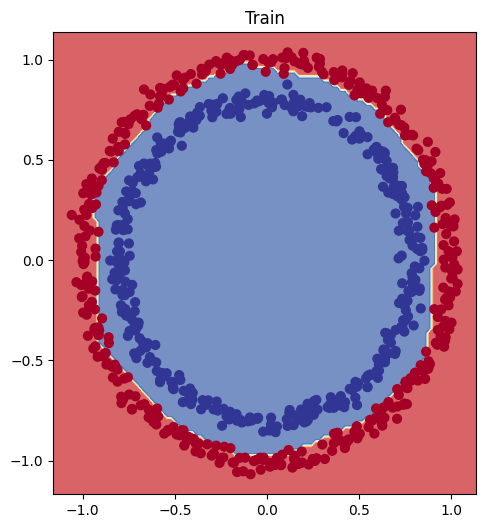

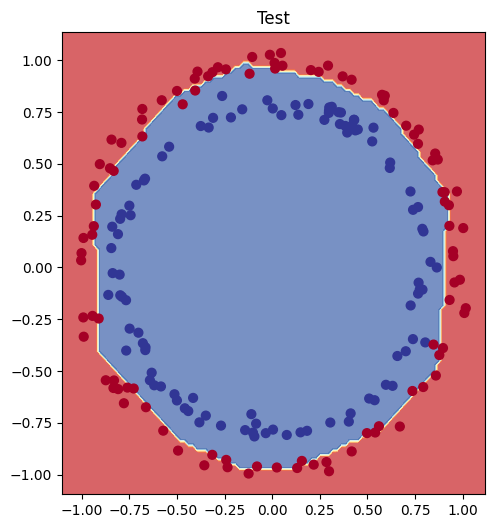

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)


In [2]:
# Creating multi-class dataset

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn
# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data

x_blob, y_blob = make_blobs(n_samples= 1000,
                            n_features= NUM_FEATURES ,
                            centers=NUM_CLASSES,
                            cluster_std= 1.7,
                            random_state= RANDOM_SEED)



In [3]:
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
x_blob.shape, y_blob.shape, x_blob.device

(torch.Size([1000, 2]), torch.Size([1000]), device(type='cpu'))

In [4]:
x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state= RANDOM_SEED)

In [5]:
x_blob_train.shape , x_blob_test.shape, y_blob_train.shape, y_blob_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [6]:
# x_blob[:,1]


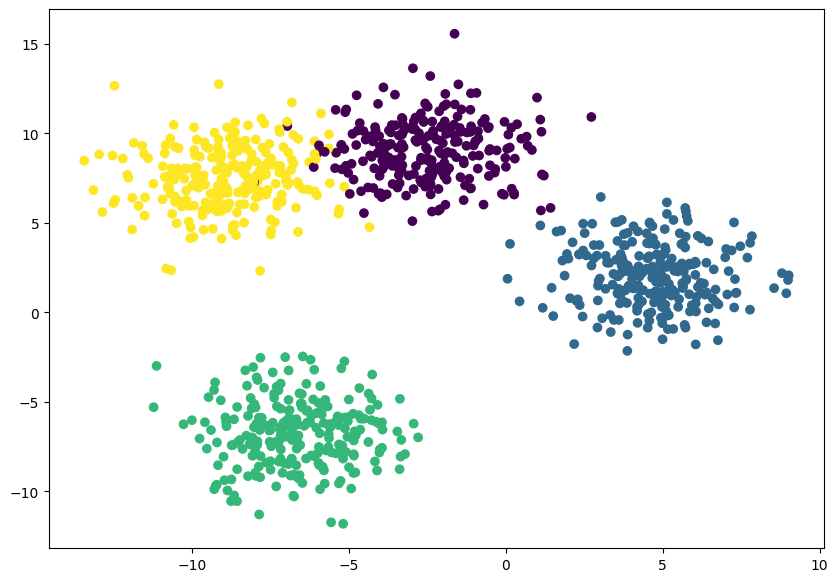

In [7]:
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0], x_blob[:,1],c=y_blob)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [9]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units ),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features ))

  def forward(self,x):
    return self.linear_layer_stack(x)

In [10]:
model_4 = BlobModel(input_features=2,
                    output_features=4 ,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [11]:
model_4.parameters

<bound method Module.parameters of BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)>

In [12]:
loss_fn = nn.CrossEntropyLoss()

In [13]:
optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)

In [14]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(x_blob_test.to(device))
y_logits[:10], y_blob_test[:10]

(tensor([[-0.6523, -0.9561, -0.2744,  0.2305],
         [-0.4197, -0.0062, -0.4850,  0.7617],
         [-0.5054, -0.4212,  0.0085,  0.6344],
         [-0.5713, -0.5476,  0.2161,  0.3503],
         [-0.6571, -0.8310, -0.3995,  0.5491],
         [-0.4585,  0.0377, -0.6236,  0.8864],
         [-0.8116, -0.7136,  0.1366,  0.8818],
         [-0.5560, -0.5272, -0.3821,  0.6085],
         [-0.2655, -0.1973, -0.2154,  0.5722],
         [-0.5866, -0.6317, -0.3796,  0.5768]], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

## As we can see above the labels does not match the numbers are from -inf to inf for predictions since they are logits. However, the lables are from 0 to number of labels. Let's use softmax to normalize them and calculate their label probabilities[0,1].

In [15]:
y_preds_probs = torch.softmax(y_logits, dim=1)
y_preds_probs[:10], y_logits[:10]

(tensor([[0.1781, 0.1314, 0.2599, 0.4306],
         [0.1491, 0.2254, 0.1397, 0.4858],
         [0.1452, 0.1580, 0.2428, 0.4540],
         [0.1485, 0.1520, 0.3263, 0.3732],
         [0.1544, 0.1298, 0.1998, 0.5160],
         [0.1365, 0.2241, 0.1157, 0.5237],
         [0.0988, 0.1090, 0.2550, 0.5372],
         [0.1557, 0.1602, 0.1852, 0.4989],
         [0.1841, 0.1971, 0.1935, 0.4254],
         [0.1566, 0.1497, 0.1926, 0.5012]], device='cuda:0'),
 tensor([[-0.6523, -0.9561, -0.2744,  0.2305],
         [-0.4197, -0.0062, -0.4850,  0.7617],
         [-0.5054, -0.4212,  0.0085,  0.6344],
         [-0.5713, -0.5476,  0.2161,  0.3503],
         [-0.6571, -0.8310, -0.3995,  0.5491],
         [-0.4585,  0.0377, -0.6236,  0.8864],
         [-0.8116, -0.7136,  0.1366,  0.8818],
         [-0.5560, -0.5272, -0.3821,  0.6085],
         [-0.2655, -0.1973, -0.2154,  0.5722],
         [-0.5866, -0.6317, -0.3796,  0.5768]], device='cuda:0'))

In [16]:
y_preds_probs.shape, y_preds_probs[0,:], torch.sum(y_preds_probs[0,:]), torch.max(y_preds_probs[0,:]), torch.argmax(y_preds_probs[0,:])

(torch.Size([200, 4]),
 tensor([0.1781, 0.1314, 0.2599, 0.4306], device='cuda:0'),
 tensor(1., device='cuda:0'),
 tensor(0.4306, device='cuda:0'),
 tensor(3, device='cuda:0'))

In [17]:
y_preds = torch.argmax(y_preds_probs)
torch.sum(y_preds)

tensor(543, device='cuda:0')

In [18]:
y_preds = torch.argmax(y_preds_probs, dim = 1)
y_preds.shape, y_preds[:10]

(torch.Size([200]), tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0'))

In [19]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/ len(y_pred)) * 100
  return acc

In [20]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)
epochs = 100

x_blob_train, y_blob_train = x_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test = x_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):

  model_4.train()

  y_train_pred_logits = model_4(x_blob_train)
  y_train_preds = torch.softmax(y_train_pred_logits, dim=1).argmax(dim = 1)

  train_loss = loss_fn(y_train_pred_logits, y_blob_train)
  train_acc = accuracy_fn(y_blob_train, y_train_preds)
  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    y_test_pred_logits = model_4(x_blob_test)
    y_test_preds = torch.softmax(y_test_pred_logits, dim=1).argmax(dim = 1)
    test_loss = loss_fn(y_test_pred_logits, y_blob_test)
    test_acc = accuracy_fn(y_test_preds, y_blob_test)

  if epoch %10 == 0:
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    print(f"-------")




Epoch: 0 | Loss: 1.55180, Accuracy: 24.12% | Test loss: 1.35008, Test acc: 28.50%
-------
Epoch: 10 | Loss: 0.89326, Accuracy: 80.62% | Test loss: 0.83343, Test acc: 85.50%
-------
Epoch: 20 | Loss: 0.52235, Accuracy: 90.75% | Test loss: 0.50524, Test acc: 91.00%
-------
Epoch: 30 | Loss: 0.35166, Accuracy: 95.75% | Test loss: 0.34020, Test acc: 96.00%
-------
Epoch: 40 | Loss: 0.25052, Accuracy: 97.38% | Test loss: 0.24336, Test acc: 98.50%
-------
Epoch: 50 | Loss: 0.16300, Accuracy: 97.88% | Test loss: 0.15211, Test acc: 99.00%
-------
Epoch: 60 | Loss: 0.10672, Accuracy: 98.12% | Test loss: 0.09367, Test acc: 99.00%
-------
Epoch: 70 | Loss: 0.08115, Accuracy: 98.12% | Test loss: 0.06852, Test acc: 99.00%
-------
Epoch: 80 | Loss: 0.06891, Accuracy: 98.12% | Test loss: 0.05698, Test acc: 99.00%
-------
Epoch: 90 | Loss: 0.06226, Accuracy: 98.25% | Test loss: 0.05071, Test acc: 99.00%
-------


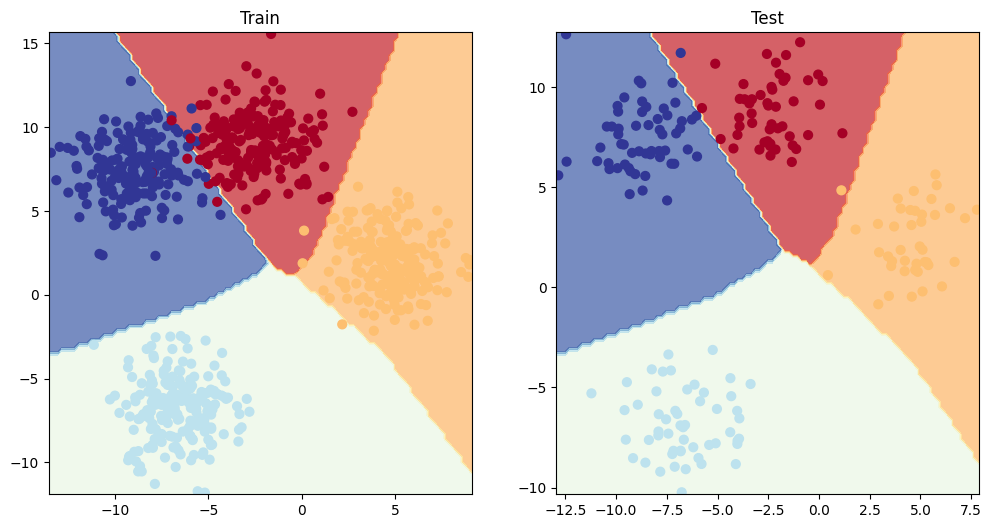

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, x_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, x_blob_test, y_blob_test)


* Accuracy: Default metrix for classification problems. Not the best for imbalanced classes. Check precission and recall.
* Precision -> Higher precission leads to less false positivies (P = tp/(tp+fp))
* Recall -> Higher recall leads to less false negatives. (Recall = tp/(tp+fn))
* F1-Score is a combination of precission and recall, usually a good overall metric for a classification model.


In [25]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 12.0 MB/s eta 0:00:00


In [26]:
import torchmetrics

In [31]:
from torchmetrics.classification.accuracy import Accuracy
torchmetric_accuracy = Accuracy(task="multiclass", num_classes = 4).to(device)
torchmetric_accuracy(y_test_preds, y_blob_test)

tensor(0.9900, device='cuda:0')